# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
weather_df = pd.DataFrame(cities)
weather_df.rename(columns={0:"City"}, inplace=True)
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Tmp"] = ""
weather_df["Wind Speed"] = ""


In [26]:
print("Beginning Data Retrieval")
print("------------------------------")
for indx, row in weather_df.iterrows():
#     if indx ==5:
#             break
    print("Processing Record {0} of {1} | {2}".format(indx+1,len(cities), row["City"]))
    url="http://api.openweathermap.org/data/2.5/weather?units=imperial&q={0}&appid={1}".format(row["City"],api_key2)
    response = requests.get(url).json()

    if "message" in response :
        print("City {0} Not found,Skipping.. ".format(row["City"]))
    else:
        row["Cloudiness"]= response["clouds"]["all"]
        row["Country"] = response["sys"]["country"]
        row["Date"] = response["dt"]
        row["Humidity"] = response["main"]["humidity"]
        row["Lat"] = response["coord"]["lat"]
        row["Lng"] = response["coord"]["lon"]
        row["Max Tmp"] = response["main"]["temp_max"]
        row["Wind Speed"] = response["wind"]["speed"]
        
#     except(KeyError, IndexError):
#         print(KeyError, IndexError)
#print(json.dumps(response, indent=4))


Beginning Data Retrieval
------------------------------
Processing Record 1 of 600 | bluff
Processing Record 2 of 600 | mogochin
City mogochin Not found,Skipping.. 
Processing Record 3 of 600 | orotukan
Processing Record 4 of 600 | dingle
Processing Record 5 of 600 | jaca
Processing Record 6 of 600 | vestmannaeyjar
Processing Record 7 of 600 | pregradnoye
Processing Record 8 of 600 | albany
Processing Record 9 of 600 | avarua
Processing Record 10 of 600 | kavieng
Processing Record 11 of 600 | ushuaia
Processing Record 12 of 600 | cape town
Processing Record 13 of 600 | letterkenny
Processing Record 14 of 600 | burnie
Processing Record 15 of 600 | new norfolk
Processing Record 16 of 600 | port elizabeth
Processing Record 17 of 600 | atuona
Processing Record 18 of 600 | barentsburg
City barentsburg Not found,Skipping.. 
Processing Record 19 of 600 | punta arenas
Processing Record 20 of 600 | san cristobal
Processing Record 21 of 600 | mataura
Processing Record 22 of 600 | yaan
Processing

Processing Record 190 of 600 | nanortalik
Processing Record 191 of 600 | preobrazheniye
Processing Record 192 of 600 | kshenskiy
Processing Record 193 of 600 | saint-philippe
Processing Record 194 of 600 | alice springs
Processing Record 195 of 600 | korla
City korla Not found,Skipping.. 
Processing Record 196 of 600 | dzheyrakh
Processing Record 197 of 600 | grand river south east
City grand river south east Not found,Skipping.. 
Processing Record 198 of 600 | sao jose da coroa grande
Processing Record 199 of 600 | jacareacanga
Processing Record 200 of 600 | tongliao
Processing Record 201 of 600 | gevrai
Processing Record 202 of 600 | vila franca do campo
Processing Record 203 of 600 | presque isle
Processing Record 204 of 600 | ilulissat
Processing Record 205 of 600 | port hardy
Processing Record 206 of 600 | mamallapuram
Processing Record 207 of 600 | paita
Processing Record 208 of 600 | lunglei
Processing Record 209 of 600 | usinsk
Processing Record 210 of 600 | mys shmidta
City my

Processing Record 373 of 600 | quatre cocos
Processing Record 374 of 600 | la palma
Processing Record 375 of 600 | jawa
Processing Record 376 of 600 | aitape
Processing Record 377 of 600 | ketchikan
Processing Record 378 of 600 | bolungarvik
City bolungarvik Not found,Skipping.. 
Processing Record 379 of 600 | kaitangata
Processing Record 380 of 600 | gambela
Processing Record 381 of 600 | plouzane
Processing Record 382 of 600 | lumphat
Processing Record 383 of 600 | santa vitoria do palmar
Processing Record 384 of 600 | upernavik
Processing Record 385 of 600 | moussoro
Processing Record 386 of 600 | nyahururu
Processing Record 387 of 600 | new london
Processing Record 388 of 600 | concordia
Processing Record 389 of 600 | bathsheba
Processing Record 390 of 600 | tezu
Processing Record 391 of 600 | pevek
Processing Record 392 of 600 | kralendijk
Processing Record 393 of 600 | te anau
Processing Record 394 of 600 | kisangani
Processing Record 395 of 600 | santa cruz
Processing Record 396

Processing Record 561 of 600 | gryazi
Processing Record 562 of 600 | warragul
Processing Record 563 of 600 | antalaha
Processing Record 564 of 600 | sibolga
Processing Record 565 of 600 | palabuhanratu
City palabuhanratu Not found,Skipping.. 
Processing Record 566 of 600 | banda aceh
Processing Record 567 of 600 | manavalakurichi
Processing Record 568 of 600 | sumbawa
City sumbawa Not found,Skipping.. 
Processing Record 569 of 600 | mangrol
Processing Record 570 of 600 | szubin
Processing Record 571 of 600 | huanan
Processing Record 572 of 600 | husavik
Processing Record 573 of 600 | moerai
Processing Record 574 of 600 | zhigalovo
Processing Record 575 of 600 | waipawa
Processing Record 576 of 600 | mavelikara
Processing Record 577 of 600 | puerto ayacucho
Processing Record 578 of 600 | louisbourg
City louisbourg Not found,Skipping.. 
Processing Record 579 of 600 | flinders
Processing Record 580 of 600 | denizli
Processing Record 581 of 600 | gangakher
Processing Record 582 of 600 | ts

In [28]:
print(json.dumps(response, indent =4))
print(url)
weather_df.head()

{
    "coord": {
        "lon": 12.98,
        "lat": 31.45
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 51.37,
        "pressure": 1014.02,
        "humidity": 80,
        "temp_min": 51.37,
        "temp_max": 51.37,
        "sea_level": 1014.02,
        "grnd_level": 957.82
    },
    "wind": {
        "speed": 13.58,
        "deg": 302.001
    },
    "clouds": {
        "all": 0
    },
    "dt": 1554171082,
    "sys": {
        "message": 0.0031,
        "country": "LY",
        "sunrise": 1554180954,
        "sunset": 1554226038
    },
    "id": 2214827,
    "name": "Mizdah",
    "cod": 200
}
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mizdah&appid=cbabb75bf7b81a74a62ff59e543b6b10


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Tmp,Wind Speed
0,bluff,0,AU,1554170616,44,-23.58,149.07,83.86,12.24
1,mogochin,,,,,,,,
2,orotukan,92,RU,1554170931,86,62.26,151.67,19.87,4.41
3,dingle,76,PH,1554170687,82,11,122.67,78.46,12.8
4,jaca,92,ES,1554170404,93,42.57,-0.55,50,1.61


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Tmp,Wind Speed
0,bluff,0,AU,1554170616,44,-23.58,149.07,83.86,12.24
1,mogochin,,,,,,,,
2,orotukan,92,RU,1554170931,86,62.26,151.67,19.87,4.41
3,dingle,76,PH,1554170687,82,11,122.67,78.46,12.8
4,jaca,92,ES,1554170404,93,42.57,-0.55,50,1.61
5,vestmannaeyjar,0,IS,1554170663,100,63.44,-20.27,30.94,19.51
6,pregradnoye,92,RU,1554170932,96,45.82,41.75,40.03,7.76
7,albany,1,US,1554170375,37,42.65,-73.75,33.8,12.75
8,avarua,12,CK,1554168600,69,-21.21,-159.78,82.4,13.87
9,kavieng,44,PG,1554170641,100,-2.57,150.8,83.32,8.43


In [30]:
weather_df.to_csv(r"weather_data_by_city.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

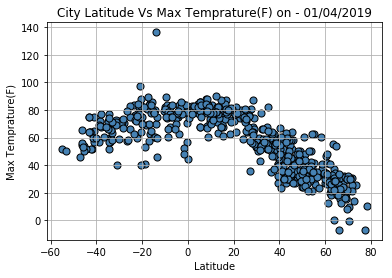

In [31]:
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Max Tmp"] = pd.to_numeric(weather_df["Max Tmp"])
weather_df.plot.scatter("Lat", "Max Tmp", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")
plt.title("City Latitude Vs Max Temprature(F) on - " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)
plt.savefig("lat_vs_temp.jpg")


#### Latitude vs. Humidity Plot

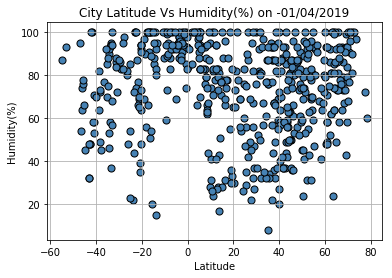

In [32]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df.plot.scatter("Lat", "Humidity", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity(%) on -" + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)
plt.savefig("lat_vs_humidity.jpg")

#### Latitude vs. Cloudiness Plot

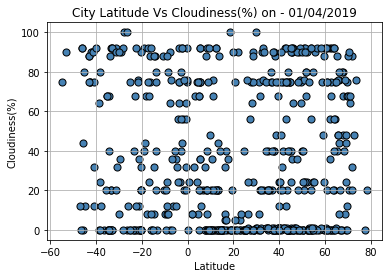

In [33]:
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df.plot.scatter("Lat", "Cloudiness", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness(%) on - " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)
plt.savefig("lat_vs_cloudiness.jpg")

#### Latitude vs. Wind Speed Plot

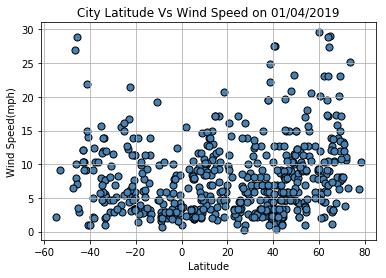

In [34]:
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])
weather_df.plot.scatter("Lat", "Wind Speed", color='#4682B4', edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude Vs Wind Speed on " + pd.datetime.now().strftime("%d/%m/%Y"))
plt.grid(True)
plt.savefig("lat_vs_windspeed.jpg")